# Predictive Analytics 1 - Machine Learning Tools - Using Python
Instructor(s) - Peter Gedeck

## Solution: Assignment 2 - Data Visualization and Preparation

In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np​%matplotlib inline
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt

DATA = Path('.').resolve().parent / 'data'  # Adapt this to your system

## Question 1
Load the laptop sales data into jupyter notebook and check if it is loaded successfully. (Optional: Observe how pandas handles the variable/column names, as compared to original names in csv file, when data is read. It will be useful to tweak the variable names for your own convenience; e.g. remove spaces.

In [2]:
# Load the data
laptop_df = pd.read_csv(DATA / 'LaptopSales.csv')

In [3]:
# Check if data is loaded correctly
print("Shape", laptop_df.shape)  # find the dimension of data frame
laptop_df.head(10)  # show the first ten observations

Shape (297572, 16)


,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,customer X,customer Y,store X,store Y
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455.0,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545.0,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515.0,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395.0,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585.0,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0
5,1/1/2008 0:12,309,W1B 5PX,SW1V 4QQ,555.0,15,6,1,2.0,Yes,120,Yes,529207,180969,528924.0,178440.0
6,1/1/2008 0:14,75,SE25 4LX,SE8 3JD,465.0,15,4,2,2.0,No,80,Yes,534575,168236,537175.0,177885.0
7,1/1/2008 0:17,346,N7 6AR,E2 0RY,450.0,15,6,2,1.5,No,40,No,530461,186176,535652.0,182961.0
8,1/1/2008 0:24,70,W3 7JT,SW18 1NN,455.0,15,4,2,2.0,Yes,120,No,520898,180071,525155.0,175180.0
9,1/1/2008 0:56,351,SW8 1RB,SW1V 4QQ,620.0,15,6,2,1.5,No,300,Yes,530298,177435,528924.0,178440.0


In [4]:
# Print the list of variables to the screen
laptop_df.columns

Index(['Date', 'Configuration', 'Customer Postcode', 'Store Postcode',
       'Retail Price', 'Screen Size (Inches)', 'Battery Life (Hours)',
       'RAM (GB)', 'Processor Speeds (GHz)', 'Integrated Wireless?',
       'HD Size (GB)', 'Bundled Applications?', 'customer X', 'customer Y',
       'store X', 'store Y'],
      dtype='object')

In [5]:
# Change the variable names to be more suitable for analysis
laptop_df.columns = ("Date", "Configuration", "Customer_Postcode", "Store_Postcode",
                     "Retail_Price", "Screen_Size_Inches", "Battery_Life_Hours",
                     "RAM_GB", "Processor_Speeds_GHz", "Integrated_Wireless", 
                     "HD_Size_GB", "Bundled_Applications", "customer_X", 
                     "customer_Y", "store_X", "store_Y")

# Alternatively use the dataframe.rename method
laptop_df = laptop_df.rename(columns={
    'Customer Postcode': 'Customer_Postcode',
    'Store Postcode': 'Store_Postcode',
    'Retail Price': 'Retail_Price', 
    'Screen Size (Inches)': 'Screen_Size_Inches', 
    'Battery Life (Hours)': 'Battery_Life_Hours',
    'RAM (GB)': 'RAM_GB',
    'Processor Speeds (GHz)': 'Processor_Speeds_GHz',
    'Integrated Wireless?': 'Integrated_Wireless',
    'HD Size (GB)': 'HD_Size_GB',
    'Bundled Applications?': 'Bundled_Applications',
    'customer X': 'customer_X', 
    'customer Y': 'customer_Y',
})
laptop_df.columns

Index(['Date', 'Configuration', 'Customer_Postcode', 'Store_Postcode',
       'Retail_Price', 'Screen_Size_Inches', 'Battery_Life_Hours', 'RAM_GB',
       'Processor_Speeds_GHz', 'Integrated_Wireless', 'HD_Size_GB',
       'Bundled_Applications', 'customer_X', 'customer_Y', 'store_X',
       'store_Y'],
      dtype='object')

In [6]:
# Alternative approach creating the rename map programmaticaly
laptop_df = pd.read_csv(DATA / 'LaptopSales.csv')
renameMap = {column: column.replace('(', '').replace(')', '').replace('?', '').replace(' ', '_') 
             for column in laptop_df.columns}
laptop_df = laptop_df.rename(columns=renameMap)
laptop_df.columns

Index(['Date', 'Configuration', 'Customer_Postcode', 'Store_Postcode',
       'Retail_Price', 'Screen_Size_Inches', 'Battery_Life_Hours', 'RAM_GB',
       'Processor_Speeds_GHz', 'Integrated_Wireless', 'HD_Size_GB',
       'Bundled_Applications', 'customer_X', 'customer_Y', 'store_X',
       'store_Y'],
      dtype='object')

## Question 2
What is the data type of each of the variable in data? Check using appropriate pandas fields. Hint: dtype or dtypes will do the job for you. Had you expected exactly the same data types as shown by pandas? Comment. Convert to more appropriate types (e.g. datetime, category).

In [7]:
# Individually:
print("Date :", laptop_df.Date.dtype)
print("Configuration :", laptop_df.Configuration.dtype)
print("Customer_Post :", laptop_df.Customer_Postcode.dtype)

# Or all at once:
laptop_df.dtypes

Date : object
Configuration : int64
Customer_Post : object


Date                     object
Configuration             int64
Customer_Postcode        object
Store_Postcode           object
Retail_Price            float64
Screen_Size_Inches        int64
Battery_Life_Hours        int64
RAM_GB                    int64
Processor_Speeds_GHz    float64
Integrated_Wireless      object
HD_Size_GB                int64
Bundled_Applications     object
customer_X                int64
customer_Y                int64
store_X                 float64
store_Y                 float64
dtype: object

We see five columns of type `object`. For further analysis, it will be useful to convert the `Date` column to `datetime` and the other four to categories (aka factor).

In [8]:
laptop_df['Date'] = pd.to_datetime(laptop_df.Date)
laptop_df.Customer_Postcode = laptop_df.Customer_Postcode.astype('category')
laptop_df.Store_Postcode = laptop_df.Store_Postcode.astype('category')
laptop_df.Integrated_Wireless = laptop_df.Integrated_Wireless.astype('category')
laptop_df.Bundled_Applications = laptop_df.Bundled_Applications.astype('category')

laptop_df.dtypes

Date                    datetime64[ns]
Configuration                    int64
Customer_Postcode             category
Store_Postcode                category
Retail_Price                   float64
Screen_Size_Inches               int64
Battery_Life_Hours               int64
RAM_GB                           int64
Processor_Speeds_GHz           float64
Integrated_Wireless           category
HD_Size_GB                       int64
Bundled_Applications          category
customer_X                       int64
customer_Y                       int64
store_X                        float64
store_Y                        float64
dtype: object

## Question 3
Are there any missing values in the data? Report the findings.

The dataframe methods `describe` and `count` both return the number of values found in each column. Whenever the count differs from the length of the dataframe, it means that there are missing values.

In [9]:
# The describe method summarizes only numerical columns
laptop_df.describe()

,Configuration,Retail_Price,Screen_Size_Inches,Battery_Life_Hours,RAM_GB,Processor_Speeds_GHz,HD_Size_GB,customer_X,customer_Y,store_X,store_Y
count,297572.000000,284129.000000,297572.000000,297572.000000,297572.000000,297572.000000,297572.000000,297572.000000,297572.000000,297424.000000,297424.000000
mean,380.211196,508.125936,15.813329,4.972111,2.099005,1.931175,132.024451,530753.795263,179880.317765,530646.695088,179748.514969
std,231.444953,104.611789,0.982424,0.810297,1.145213,0.360418,97.766076,4576.260844,4640.319267,4220.343734,3963.601614
min,1.000000,168.000000,15.000000,4.000000,1.000000,1.500000,40.000000,512253.000000,164886.000000,517917.000000,168302.000000
25%,193.000000,440.000000,15.000000,4.000000,1.000000,1.500000,40.000000,529107.000000,178716.000000,528924.000000,178440.000000
50%,348.000000,500.000000,15.000000,5.000000,2.000000,2.000000,80.000000,530954.000000,181081.000000,529902.000000,179641.000000
75%,577.000000,575.000000,17.000000,6.000000,2.000000,2.400000,120.000000,533079.000000,182055.000000,534057.000000,181567.000000
max,864.000000,890.000000,17.000000,6.000000,4.000000,2.400000,300.000000,549065.000000,199846.000000,541428.000000,190628.000000


In [10]:
# The info method gives the count of non-null values for each column
laptop_df.count()

Date                    297364
Configuration           297572
Customer_Postcode       297572
Store_Postcode          297572
Retail_Price            284129
Screen_Size_Inches      297572
Battery_Life_Hours      297572
RAM_GB                  297572
Processor_Speeds_GHz    297572
Integrated_Wireless     297572
HD_Size_GB              297572
Bundled_Applications    297572
customer_X              297572
customer_Y              297572
store_X                 297424
store_Y                 297424
dtype: int64

In [11]:
# Subtracting the count from the length of the dataframe gives the number of missing values
len(laptop_df) - laptop_df.count()

Date                      208
Configuration               0
Customer_Postcode           0
Store_Postcode              0
Retail_Price            13443
Screen_Size_Inches          0
Battery_Life_Hours          0
RAM_GB                      0
Processor_Speeds_GHz        0
Integrated_Wireless         0
HD_Size_GB                  0
Bundled_Applications        0
customer_X                  0
customer_Y                  0
store_X                   148
store_Y                   148
dtype: int64

## Question 4
Observe the missing values graphically and comment on it. (Hint: use seaborn's heatmap)

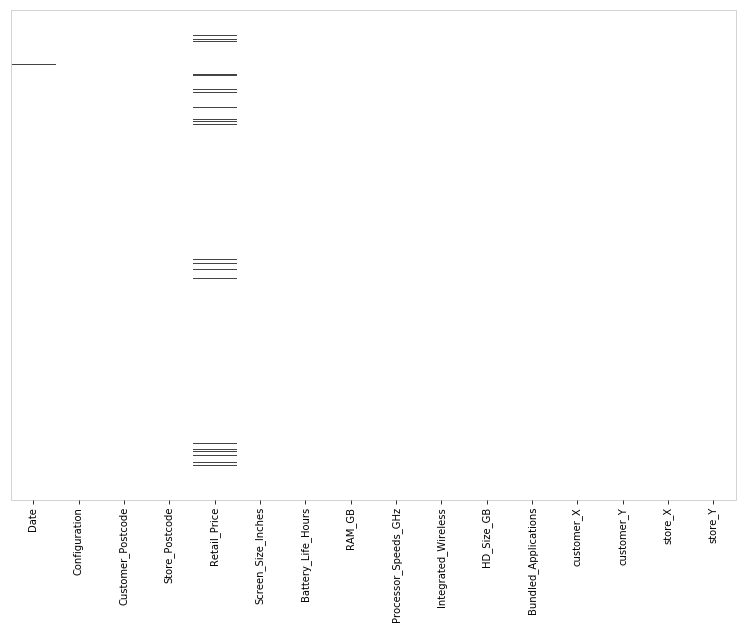

In [12]:
# Given a dataframe df create a copy of the array that is 0 if a field contains a value 
# and 1 for NaN
naInfo = np.zeros(laptop_df.shape)
naInfo[laptop_df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=laptop_df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#444444"], cbar=False, ax=ax)
ax.set_yticks([])

# Draw a rectangle around the graph
rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1, 
                     edgecolor='lightgrey',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

In contrast to the observation in question 3 the heatmap only shows missing values for the `Retail_price`. The few missing values for `Date` and `store_X` and `store_Y` are not visible in this graph. Due to the large data size it is not very useful for getting any additional insights.

## Question 5
At what average and median price do the laptops sell? Hint: Use distribution of values to answer this question.

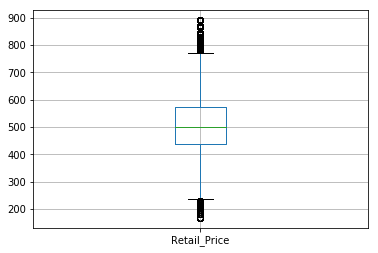

In [13]:
ax = laptop_df.boxplot(column='Retail_Price')

Boxplot shows that the median price is about \\$500 and that the majority of laptops sell for prices between approximately \\$200 and \\$850. 

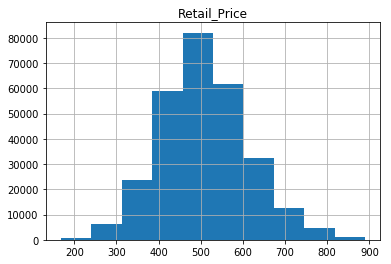

In [14]:
ax = laptop_df.hist(column='Retail_Price')

The histogram of price shows the symmetric, single-peaked shape of the price distribution.

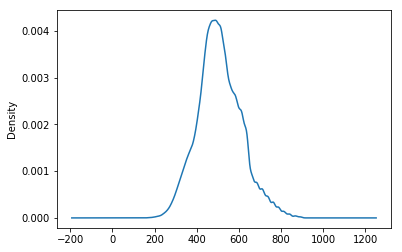

In [15]:
ax = laptop_df.Retail_Price.plot(kind='density')

Density plots are an alternative to histograms that can sometimes reveal more structure in the data.

## Question 6
Compare retail prices across stores. Do prices vary across the stores? Which stores look costly in general?

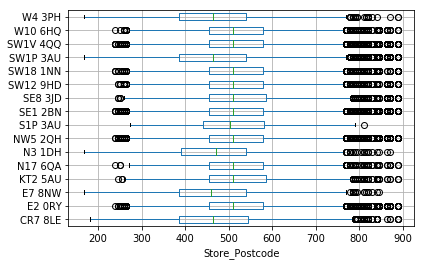

In [16]:
# The argument vert creates horizontal boxplots
ax = laptop_df.boxplot(column='Retail_Price', by='Store_Postcode', vert=False)
# Suppress the titles
plt.suptitle('')  
plt.title('')

plt.show()

We can see that overall the median price is similar across stores (around \\$500, plus minus \\$50). However, it is easy to see that there are two types of stores: 
Five have a median of about \\$460 and a wider prace range. 
The others have a median price of \\$510 and a slightly smaller price range.

## Question 7
Does price of laptop vary according to integrated wireless?

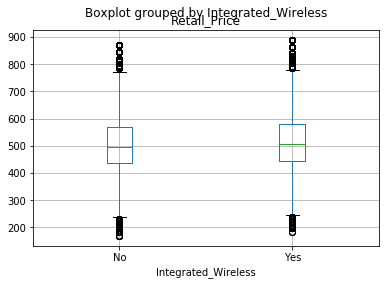

In [17]:
ax = laptop_df.boxplot(column='Retail_Price', by='Integrated_Wireless')

Overall the median price is similar for both, laptops with integrated wireless and without

## Question 8
Draw the scatter plot of retail prices with
- Screen Size
- Battery Life
- RAM
- Processor
- HD Size
- Configuration
Comment on the utility of these scatter plots.

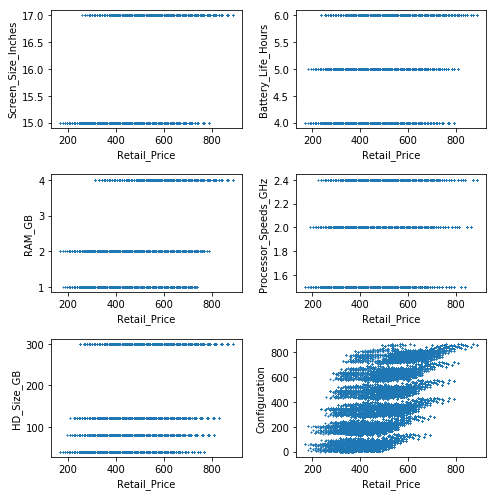

In [18]:
# Show all graphs in one 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
columns = ['Screen_Size_Inches', 'Battery_Life_Hours', 'RAM_GB', 'Processor_Speeds_GHz', 
           'HD_Size_GB', 'Configuration']
for i, column in enumerate(columns):
    laptop_df.plot(kind='scatter', x='Retail_Price', y=column, s=0.1, ax=axes[i // 2, i % 2])
plt.tight_layout()

## Question 9
In your opinion, which of the configurations make the biggest difference in the laptop price?

Use boxplots of different configuration variables one by one to see which 
configuration option makes bigger differences than others

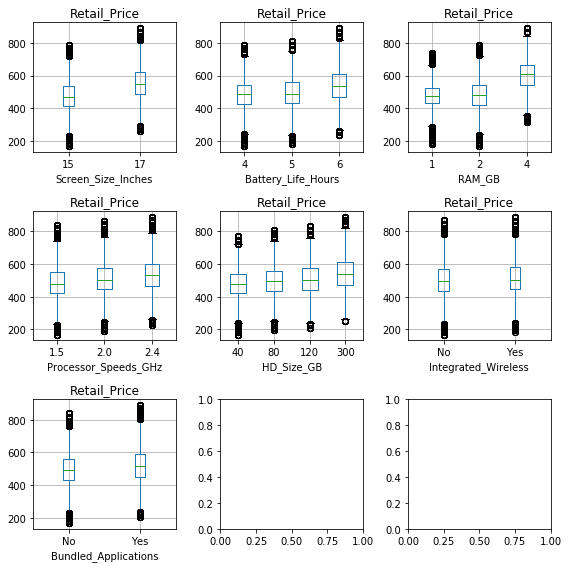

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
columns = ['Screen_Size_Inches', 'Battery_Life_Hours', 'RAM_GB', 'Processor_Speeds_GHz', 
           'HD_Size_GB', 'Integrated_Wireless', 'Bundled_Applications']
for i, column in enumerate(columns):
    laptop_df.boxplot(column='Retail_Price', by=column, ax=axes[i // 3, i % 3])
plt.tight_layout()
# Suppress the titles
plt.suptitle('')  
plt.title('')
plt.show()

Some configuration options make a bigger price difference than others 
(e.g., screen size has a clear impact, while bandwidth does not, RAM size 
makes a difference mostly if you choose the largest size.)